In [13]:
import numpy as np

from utils.loadData import loadData, loadDataWithNews
from lstm.preprocessing import dataToTimeSeries, getDatasets, normalizeAtOnce
from lstm.model import getModel, evaluateModelQuick, evaluateFinal
from lstm.visualization import visualize_loss, show_batch, show_data_simple, showRegressionExample
from lstm.callbacks import es_callback, modelckpt_callback
from keras.utils.vis_utils import plot_model

In [14]:
df = loadDataWithNews()

In [15]:
features = np.array(df["Close"]).reshape(-1, 1)
normalized_data, scaler = normalizeAtOnce(features)

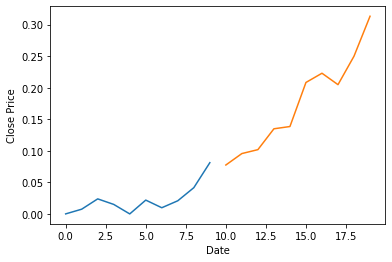

Input shape: (128, 10, 1)
Target shape: (128, 1)


In [16]:
config = {
    "past": 10, # try 10, 50, 100, 300
    "future": 10, # try 5, 50, 100
    "neurons": 50,
    "batch_size": 128, # large batches allow faster training
    "epochs": 50,
    "features": 1
}

dataset_train, dataset_val, x_test, y_test = getDatasets(config, normalized_data)


for batch in dataset_train.take(1):
    inputs, targets = batch
    show_batch(inputs[0], targets[:config["future"]], config["past"])

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

In [17]:
model = getModel(config)
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 10, 1)]           0         
                                                                 
 lstm_22 (LSTM)              (None, 10, 50)            10400     
                                                                 
 lstm_23 (LSTM)              (None, 50)                20200     
                                                                 
 dense_11 (Dense)            (None, 10)                510       
                                                                 
Total params: 31,110
Trainable params: 31,110
Non-trainable params: 0
_________________________________________________________________


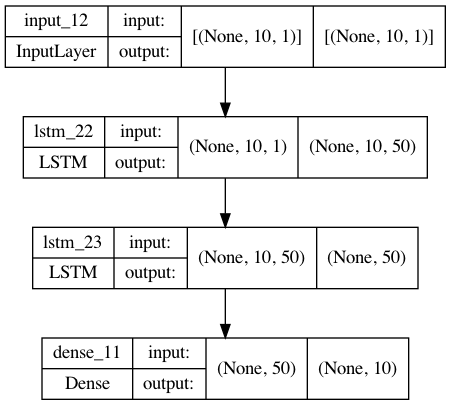

In [18]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Epoch 1/50
3/3 [==============================] - ETA: 0s - loss: 0.3370 - rmse: 0.5805 - mae: 0.5365 - mape: 98.9540  
Epoch 1: val_loss did not improve from 0.00644
3/3 [==============================] - 7s 424ms/step - loss: 0.3370 - rmse: 0.5805 - mae: 0.5365 - mape: 98.9540 - val_loss: 0.1365 - val_rmse: 0.3695 - val_mae: 0.3628 - val_mape: 93.1570
Epoch 2/50
3/3 [==============================] - ETA: 0s - loss: 0.2909 - rmse: 0.5393 - mae: 0.4946 - mape: 90.5867
Epoch 2: val_loss did not improve from 0.00644
3/3 [==============================] - 0s 69ms/step - loss: 0.2909 - rmse: 0.5393 - mae: 0.4946 - mape: 90.5867 - val_loss: 0.1127 - val_rmse: 0.3358 - val_mae: 0.3258 - val_mape: 83.4249
Epoch 3/50
1/3 [=========>....................] - ETA: 0s - loss: 0.2838 - rmse: 0.5327 - mae: 0.4832 - mape: 84.6496
Epoch 3: val_loss did not improve from 0.00644
3/3 [==============================] - 0s 64ms/step - loss: 0.2436 - rmse: 0.4935 - mae: 0.4452 - mape: 80.7723 - val_loss: 0.

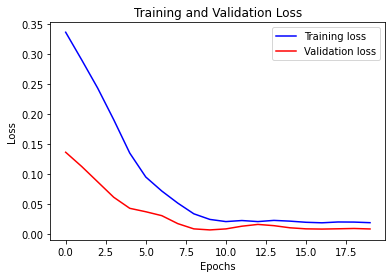

In [19]:
history = model.fit(
    dataset_train,
    epochs=config["epochs"],
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
visualize_loss(history)

In [20]:
x, y = dataToTimeSeries(x_test, y_test, config["past"], config["future"])

In [21]:
evaluateModelQuick(model, x, y)

1/1 [==============================] - 1s 766ms/step - loss: 0.0065 - rmse: 0.0808 - mae: 0.0687 - mape: 14.9217
---- TEST RESULTS ----
MSE loss - 0.006535273510962725
RMSE - 0.08084103465080261


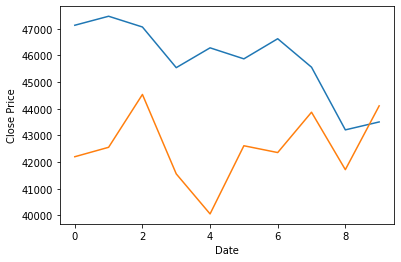

In [22]:
showRegressionExample(x[15], y[15], model, scaler)

In [23]:
evaluateFinal(getModel, dataset_train, dataset_val, x, y, config, "regression_just_price_limited_news_data")

Training Started...
Iterations:
1/1 [==============================] - 1s 895ms/step - loss: 0.0062 - rmse: 0.0789 - mae: 0.0650 - mape: 14.7414
1
1/1 [==============================] - 1s 766ms/step - loss: 0.0068 - rmse: 0.0822 - mae: 0.0664 - mape: 15.1841
2
1/1 [==============================] - 1s 767ms/step - loss: 0.0066 - rmse: 0.0811 - mae: 0.0649 - mape: 14.8910
3
1/1 [==============================] - 1s 1s/step - loss: 0.0064 - rmse: 0.0798 - mae: 0.0651 - mape: 14.8082
4
1/1 [==============================] - 1s 905ms/step - loss: 0.0079 - rmse: 0.0889 - mae: 0.0752 - mape: 16.3061
5
1/1 [==============================] - 1s 1s/step - loss: 0.0067 - rmse: 0.0819 - mae: 0.0660 - mape: 15.0995
6
1/1 [==============================] - 1s 983ms/step - loss: 0.0063 - rmse: 0.0791 - mae: 0.0643 - mape: 14.6607
7
1/1 [==============================] - 1s 1s/step - loss: 0.0067 - rmse: 0.0816 - mae: 0.0698 - mape: 15.2382
8
1/1 [==============================] - 1s 1s/step - loss: